In [2]:
# GridSearchCV

# 使用RandomForest对IRIS数据集进行分类
# 利用GridSearchCV寻找最优参数
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

rf = RandomForestClassifier()
parameters = {'n_estimators': range(1,11)}
iris = load_iris()

# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=rf, param_grid=parameters)

# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print(f'最优分数:{clf.best_score_}')
print(f'最优参数:{clf.best_params_}')

最优分数:0.9666666666666668
最优参数:{'n_estimators': 5}


In [16]:
# Pipeline 管道机制
# pipeline = Pipeline([
#     ('scaler',StandardScaler()),
#     ('pca', PCA()),
#     ('randomforestclassifier', RandomForestClassifier())
# ])

# 管道机制实例
'''
用随机森林对 IRIS 数据集做一下分类
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier()
parameters = {'randomforestclassifier__n_estimators':range(1,11)}

iris = load_iris()

# 先用StandardScaler方法对数据规范化，然后再用随机森林分类
ple=Pipeline([
    ('scaler', StandardScaler()),
    ('randomforestclassifier', rf)
])

# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=ple, param_grid=parameters)

# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print(f'最优分数:{clf.best_score_}')
print(f'最优参数:{clf.best_params_}')



最优分数:0.96
最优参数:{'random__n_estimators': 3}


(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

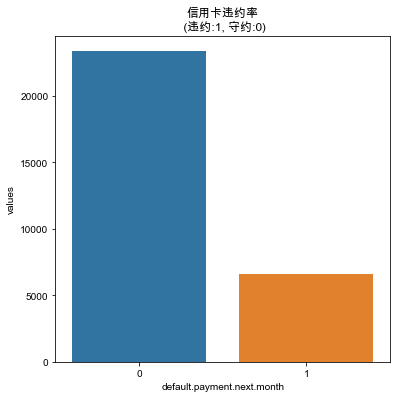


 ****************************** 
分类器信息:

GS最优参数:{'svc__C': 1, 'svc__gamma': 0.01}
GS最优分数:0.8186190476190477
准确率:0.8172222222222222

 ****************************** 
分类器信息:

GS最优参数:{'decisiontreeclassifier__max_depth': 6}
GS最优分数:0.8208095238095238
准确率:0.8113333333333334

 ****************************** 
分类器信息:

GS最优参数:{'randomforestclassifier__n_estimators': 6}
GS最优分数:0.8004285714285713
准确率:0.7994444444444444

 ****************************** 
分类器信息:

GS最优参数:{'kneighborsclassifier__n_neighbors': 8}
GS最优分数:0.804
准确率:0.8035555555555556


In [48]:
# 信用卡违约率进行分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

# 数据加载
data = data = pd.read_csv('data/UCI_Credit_Card.csv')

# 数据探索
print(data.shape) # 查看数据集的大小
print(data.describe()) # 数据集概览

# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

df=pd.DataFrame({'default.payment.next.month': next_month.index, 'values':next_month.values})

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.figure(figsize=(6,6))
plt.title('信用卡违约率\n (违约:1, 守约:0)')
sns.set_color_codes('pastel')
sns.barplot(x = "default.payment.next.month", y="values", data = df)

locs, labels = plt.xticks()
plt.show()

# 特征选择，去掉ID字段，最后一个结果字段即可
data.drop(['ID'], inplace=True, axis=1) # ID这个字段没有用
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 0.30, stratify = target, random_state=1)

# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),
    DecisionTreeClassifier(random_state = 1, criterion='gini'),
    RandomForestClassifier(random_state = 1, criterion='gini'),
    KNeighborsClassifier(metric = 'minkowski')
]

# 分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier'
]

# 分类器参数
classifier_param_grid = [
    {'svc__C':[1], 'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]}
]

# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipepline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    print('\n','*'*30,'\n分类器信息:\n')
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid=param_grid, scoring=score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print(f'GS最优参数:{search.best_params_}')
    print(f'GS最优分数:{search.best_score_}')
    predict_y = gridsearch.predict(test_x)
    print(f'准确率:{accuracy_score(test_y, predict_y)}')
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')